## left to do -> 

define what "dry soil" and "wet soil" are


In [ ]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [61]:
#have to read in from home directory because i get an error if file lives in my data/rong3/annie/gleam_sgp folder

base_path = ""

# surface soil moisture is measured in m^3/m^3

files = "SMs*.nc"

files_path = os.path.join(base_path, files)

sm = xr.open_mfdataset(files_path, combine='by_coords')

In [62]:
# Southern Great Plains boundaries
lat_start = 30

lat_end = 39.05

lon_start = -105.05

lon_end = -95.05

# Time range
start_date = np.datetime64('2001-05-01T00:00:00.000000000')

end_date = np.datetime64('2018-09-30T00:00:00.000000000')

# Subset SMrz data based on lat, lon, and overall time range
sm_sub = sm.sel(
    
    {
        'time': slice(start_date, end_date),
        'lat': slice(lat_end, lat_start),
        'lon': slice(lon_start, lon_end)
    }
)

# Filter to only include months 5 to 9 (inclusive)
sm_sub = sm_sub.where(sm_sub['time.month'].isin([5, 6, 7, 8, 9]), drop=True)

# Ensure the time range is within 2001 to 2018 (inclusive)
sm_sub = sm_sub.where((sm_sub['time.year'] >= 2001) & (sm_sub['time.year'] <= 2018), drop=True)

sm_sub['time'].data[0], sm_sub['time'].data[-1]

(numpy.datetime64('2001-05-01T00:00:00.000000000'),
 numpy.datetime64('2009-09-30T00:00:00.000000000'))

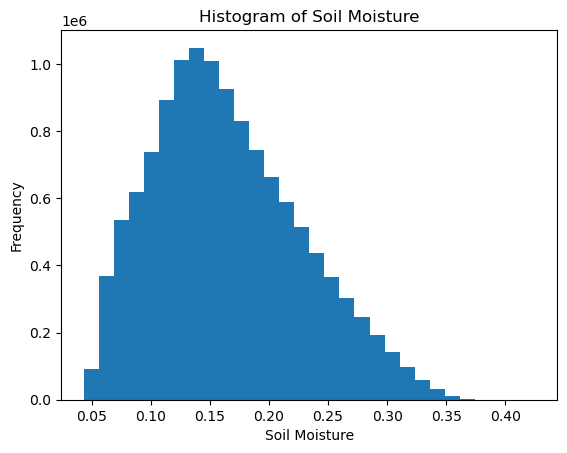

In [72]:
data = sm_sub['SMs']  

# Create histogram
data.plot.hist(bins=30)  # `bins` can be adjusted

# Set labels and title
plt.xlabel('Soil Moisture')
plt.ylabel('Frequency')
plt.title('Histogram of Soil Moisture')

# Show plot
plt.show()

In [83]:
np.nanmean(sm_sub['SMs'].data[25])

0.15827788

2001-05-26T00:00:00.000000000
avg sm:  0.15827788


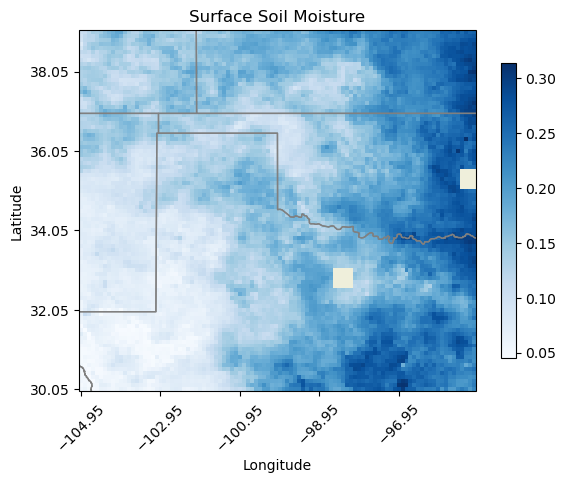

2001-05-27T00:00:00.000000000
avg sm:  0.1644074


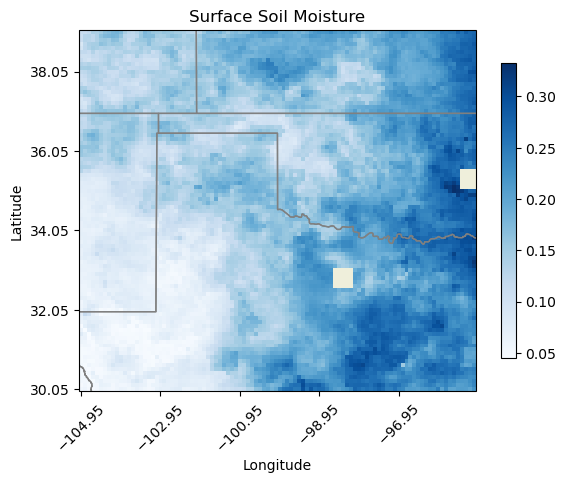

In [84]:
#first and last soil moisture map in timeseries: beginning and end of warm-season

for i in [25,26]:
    
    t = sm_sub['time'].data[i]
    print(t)

    soil_moisture = sm_sub['SMs'].data[i]
    print("avg sm: ", np.nanmean(soil_moisture))

    latitudes = sm_sub['lat'].data  # Example latitude values

    longitudes = sm_sub['lon'].data  # Example longitude values

    # Create a meshgrid for latitudes and longitudes
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

    # Define the plot
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    cmap = plt.get_cmap('Blues')

    norm = plt.Normalize(vmin=np.nanmin(soil_moisture), vmax=np.nanmax(soil_moisture))

    # Plot the soil moisture data
    contour = ax.pcolormesh(lon_grid, lat_grid, soil_moisture, cmap=cmap, norm=norm, shading='auto')

    # Add geographical features
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.add_feature(cfeature.COASTLINE)

    ax.add_feature(cfeature.LAND, edgecolor='black')

    ax.add_feature(cfeature.OCEAN)

    ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='gray')

    # Add a colorbar
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.8)

#     cbar.set_label('Soil Moisture')

    # Add labels and title
    ax.set_xlabel('Longitude')

    ax.set_ylabel('Latitude')

    ax.set_xticks(np.arange(np.min(longitudes), np.max(longitudes), 2))

    ax.set_yticks(np.arange(np.min(latitudes), np.max(latitudes), 2)) 

    plt.xticks(rotation=45)

    ax.set_title('Surface Soil Moisture')

    plt.show()

In [74]:
# Assume the variable name is 'variable_name'
soil_moisture = sm_sub['SMs']

# Compute the terciles (33.3% and 66.6%)
terciles = soil_moisture.quantile([1/3, 2/3])  # Replace 'time' with the dimension you're interested in

# Access the lower and upper terciles
lower_tercile = terciles.sel(quantile=1/3)
upper_tercile = terciles.sel(quantile=2/3)

terciles

<xarray.DataArray 'SMs' (quantile: 2)> Size: 16B
array([0.13127003, 0.18738277])
Coordinates:
  * quantile  (quantile) float64 16B 0.3333 0.6667